# Extract data from text file


    Dataset: DAVIS240C
    Spatial resolution: 240 * 180

In [1]:
import numpy as np
from matplotlib import pyplot as plt

def extract_data(filename):
    infile = open(filename, 'r')
    ts, x, y, p = [], [], [], []
    for line in infile:
        words = line.split()
        ts.append(float(words[0]))
        x.append(int(words[1]))
        y.append(int(words[2]))
        p.append(int(words[3]))
    infile.close()
    return ts, x, y, p

In [2]:
ts, x, y, p = extract_data('Sample.txt')

In [3]:
Spatial_size = (180,240)
num_events = 5000

In [4]:
# print a sample event
print(ts[0], x[0], y[0], p[0])

0.003811 96 133 0


# Plot an Event frame

    If we consider an image, each pixel has a polarity (1, 0, -1)

In [10]:
# skip the timestamps, consider an 2-D image
# create an image with spatial resolution of (x, y)
# polarity is the pixel's value

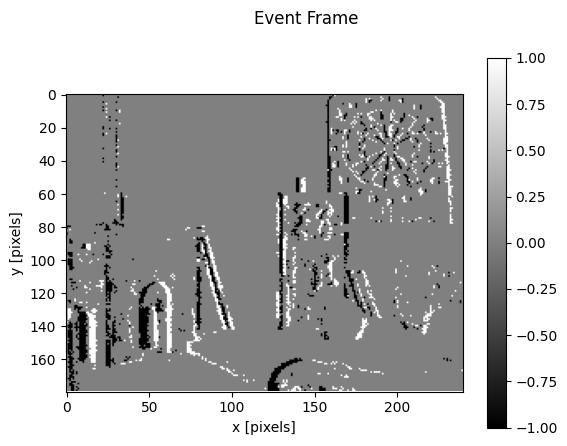

In [7]:
img = np.zeros(shape=Spatial_size, dtype=int)

for i in range(num_events):
        img[y[i], x[i]] = (2*p[i]-1)

# draw image
fig = plt.figure()
fig.suptitle('Event Frame')
plt.imshow(img, cmap='gray')
plt.xlabel("x [pixels]")
plt.ylabel("y [pixels]")
plt.colorbar()
plt.savefig('event_frame.jpg')
plt.show()

# Accumulate Frame

In [ ]:
# Now, consider the real spatial size of the event camera which is 180*240
# then accumulate all the frames

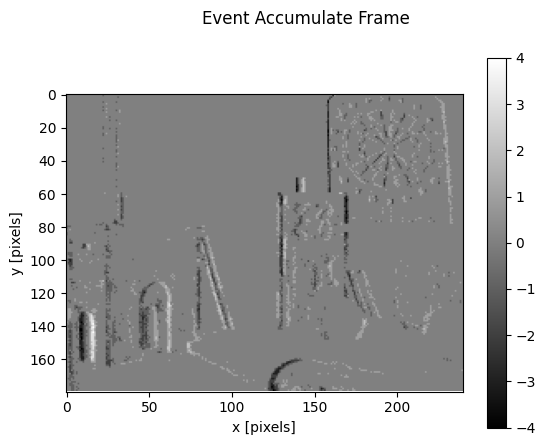

In [11]:
camera_size = (180,240)
num_events = 5000
img = np.zeros(shape=camera_size, dtype=int)

for i in range(num_events):
    img[y[i], x[i]] += (2*p[i]-1)

# draw image
fig = plt.figure()
fig.suptitle('Event Accumulate Frame')
plt.imshow(img, cmap='gray')
plt.xlabel("x [pixels]")
plt.ylabel("y [pixels]")
plt.colorbar()
plt.savefig('event_accumulate_frame.jpg')
plt.show()

# 3-D Grid

In [ ]:
# Consider timestamps as a third dimension

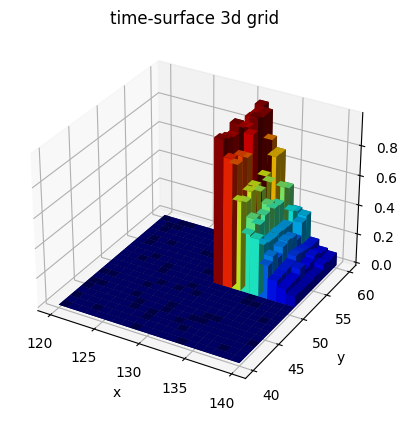

In [12]:
camera_size = (180,240)
img = np.zeros(shape=camera_size, dtype=int)

# parameters for Time Surface
t_ref = ts[-1]      # 'current' time
tau = 50e-3         # 50ms

sae = np.zeros(camera_size, np.float32)

# calculate timesurface using expotential decay
for i in range(len(ts)):
    if(p[i] == 0):          # only for negative ts.
        sae[y[i], x[i]] = np.exp(-(t_ref-ts[i]) / tau)

# select a roi, to avoid to much data.
roi_x0 = 120
roi_x1 = 140
roi_y0 = 40
roi_y1 = 60
x_range = np.arange(roi_x0, roi_x1)
y_range = np.arange(roi_y0, roi_y1)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
xx, yy = np.meshgrid(x_range, y_range)
x, y = xx.ravel(), yy.ravel()

top = sae[roi_y0:roi_y1, roi_x0:roi_x1].ravel()
colors = plt.cm.jet(top/np.max(top))                # color coding
bottom = np.zeros_like(top)

ax.bar3d(x, y, bottom, 1, 1, top, shade=True, color=colors)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('time-surface 3d grid')
plt.show()

# 2-D Histogram for Pos and Neg polarity events

In [14]:
def extract_data(filename):
    infile = open(filename, 'r')
    timestamp = []
    x = []
    y = []
    pol = []
    for line in infile:
        words = line.split()
        timestamp.append(float(words[0]))
        x.append(int(words[1]))
        y.append(int(words[2]))
        pol.append(int(words[3]))
    infile.close()
    return timestamp,x,y,pol

# Call the function to read data
timestamp, x, y, pol = extract_data("Sample.txt")

In [15]:
img_size = (180,240)
num_events = 5000

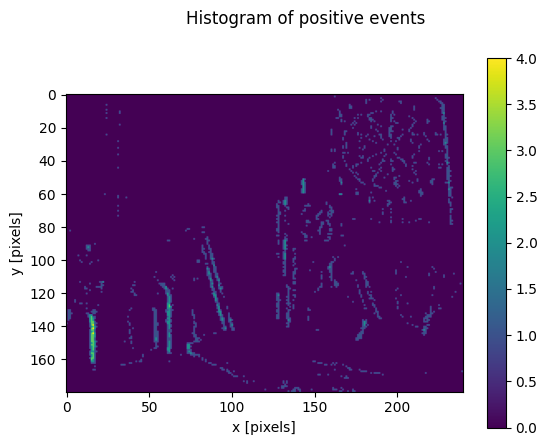

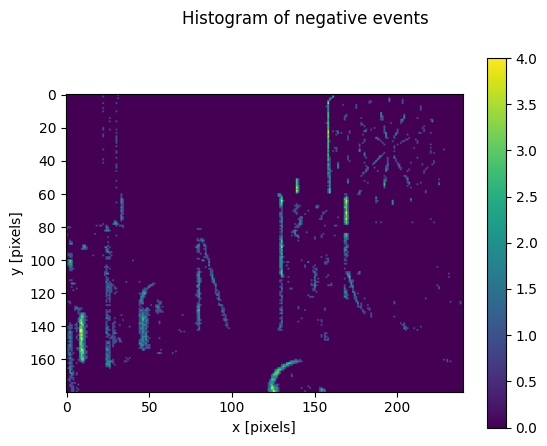

In [17]:
# %% 2D Histograms of events, split by polarity (positive and negative events in separate images)
img_pos = np.zeros(img_size)
img_neg = np.zeros(img_size)
for i in range(num_events):
    if (pol[i] > 0):
        img_pos[y[i],x[i]] += 1 # count events
    else:
        img_neg[y[i],x[i]] += 1

fig = plt.figure()
fig.suptitle('Histogram of positive events')
plt.imshow(img_pos)
plt.xlabel("x [pixels]")
plt.ylabel("y [pixels]")
plt.colorbar()
plt.show()

fig = plt.figure()
fig.suptitle('Histogram of negative events')
plt.imshow(img_neg)
plt.xlabel("x [pixels]")
plt.ylabel("y [pixels]")
plt.colorbar()
plt.show()